Статистика по total:
 count    4.250000e+02
mean     1.317572e+05
std      1.409593e+05
min      1.555750e+03
25%      5.690200e+04
50%      9.358250e+04
75%      1.772236e+05
max      1.056878e+06
Name: total, dtype: float64

Доля возрастных групп:
 18_30    0.044985
31_40    0.070185
41_50    0.093365
51_60    0.170681
60_      0.620784
dtype: float64


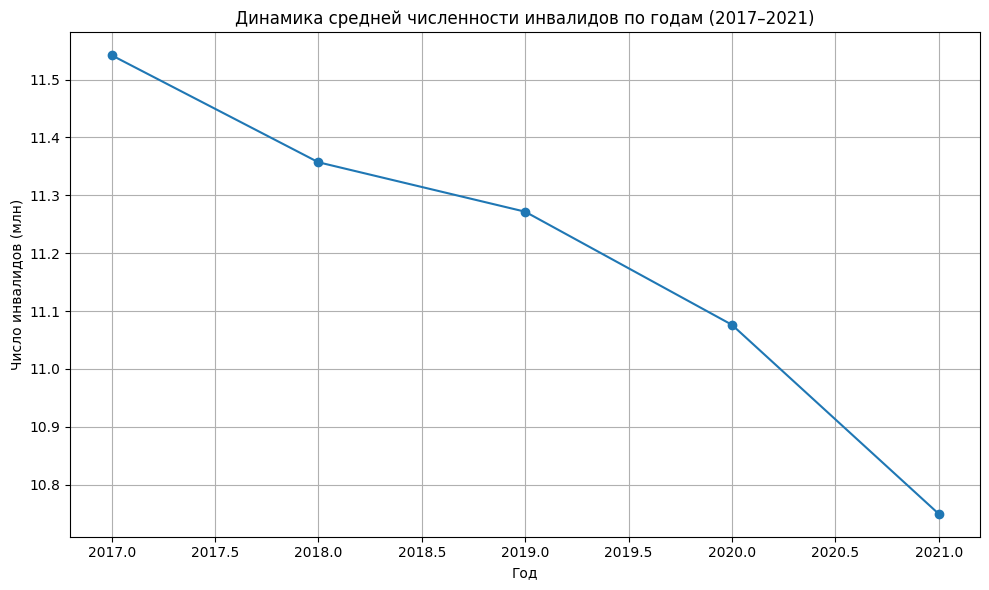

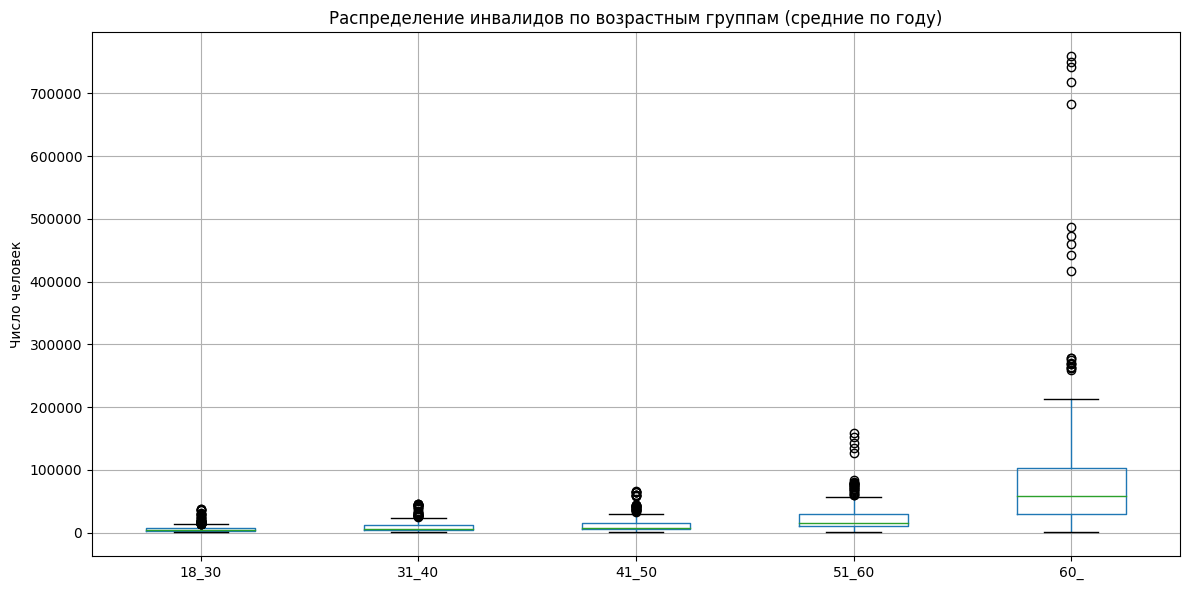

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/disabled_standardized.csv"
df = pd.read_csv(file_path)

# 2. Очистка
df = df[df["region_standard"].notna()]
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# 3. Исключаем неполный 2022 год
df = df[df["year"] < 2022]

# 4. Группировка по году и региону — именно **СРЕДНЕЕ**, не сумма!
grouped = df.groupby(["region_standard", "year"]).agg({
    "total": "mean",
    "18_30": "mean",
    "31_40": "mean",
    "41_50": "mean",
    "51_60": "mean",
    "60_": "mean"
}).reset_index()

# 5. Проверка общей статистики
print("Статистика по total:\n", grouped["total"].describe())

# 6. Доля возрастных групп
age_cols = ["18_30", "31_40", "41_50", "51_60", "60_"]
age_shares = grouped[age_cols].sum() / grouped["total"].sum()
print("\nДоля возрастных групп:\n", age_shares)

# 7. Тренд по годам
total_by_year = grouped.groupby("year")["total"].sum()

plt.figure(figsize=(10,6))
plt.plot(total_by_year.index, total_by_year.values / 1e6, marker="o")
plt.title("Динамика средней численности инвалидов по годам (2017–2021)")
plt.xlabel("Год")
plt.ylabel("Число инвалидов (млн)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Boxplot по возрастным группам
plt.figure(figsize=(12,6))
grouped.boxplot(column=age_cols)
plt.title("Распределение инвалидов по возрастным группам (средние по году)")
plt.ylabel("Число человек")
plt.grid(True)
plt.tight_layout()
plt.show()


##  Анализ инвалидности по регионам (данные 2017–2021 гг.)

###  Статистика по общей численности инвалидов:
- **Медиана**: ~93 582 человек
- **Среднее**: ~131 572 человек
- **Минимум**: ~1 556 человек
- **Максимум**: ~1 056 878 человек
- Значения теперь адекватны: ранее наблюдались искусственные завышения из-за сложения по месяцам.

---

### Динамика инвалидности по годам (2017–2021):

- Общая численность инвалидов **снижается** с ~11.56 млн до ~10.75 млн.
- Возможные причины: демографические изменения, изменения в учёте или в законодательстве.

 График тренда ясно показывает эту отрицательную динамику.

---

### Распределение по возрастным группам:

| Возрастная группа | Доля |
|--------------------|------|
| 18–30              | 4.5% |
| 31–40              | 7.0% |
| 41–50              | 9.3% |
| 51–60              | 17.1% |
| **60+**            | **62.1%**  |

- Основная доля инвалидов приходится на **группу 60+**, что отражает естественные возрастные процессы.
- Boxplot показывает значительные выбросы в старшей возрастной группе (особенно для густонаселённых регионов).


In [2]:
# Cохранение результатов после EDA
grouped.to_csv("../../data/clean/disabled_AfterEDA.csv", index=False)